## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [140]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np 

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [141]:
student_df = pd.read_csv("students-data.csv", delimiter= ";" )
student_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [142]:
#  Giving the index column a qualifier as "number" 
#student_df.index.name = 'number'
#student_df.head()

# Check the file for missing values if no missing values then proceed else handle the missing values
#student_df.isnull().sum(axis=0)
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [143]:
student_df_not_num = student_df.select_dtypes(exclude='int64').columns
student_df_not_num

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [49]:
#student_df_1 = student_df.drop(student_df.var()[student_df.var() < 1].index.values, axis = 1)
#student_df_1.shape

(395, 27)

In [144]:
student_df.var() < 1

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [145]:
student_df1 = student_df.drop(['traveltime','studytime','failures','famrel','freetime','Dalc'], axis=1)
student_df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [146]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for columns in student_df.select_dtypes(exclude='int64').columns:
    student_df[columns] = label_encoder.fit_transform(student_df[columns])

student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [147]:
student_df['G1'] = student_df['G1'].apply(lambda x: 1 if x >= 10 else 0)
student_df['G2'] = student_df['G2'].apply(lambda x: 1 if x >= 10 else 0)
student_df['G3'] = student_df['G3'].apply(lambda x: 1 if x >= 10 else 0)
student_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,0,1,1
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,1,1,1
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,1,1,1
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,0,0,0
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,1,1,1
9,0,1,15,1,0,1,3,4,2,2,...,5,5,1,1,1,5,0,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [148]:
Y = student_df['G3']
X = student_df.drop(['G3'], axis=1)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

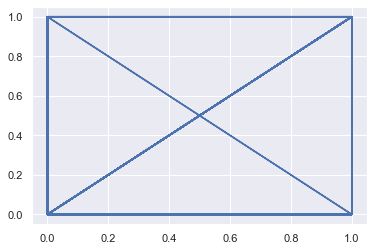

In [149]:
plt.plot(student_df['G2'],student_df['G3'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

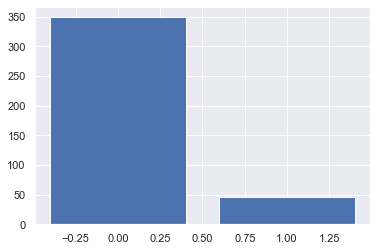

In [150]:
col = student_df['school']
plt.bar(x=col.value_counts().index,height=col.value_counts())
plt.show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=300, random_state=1)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [152]:
LogisticModel = LogisticRegression()
LogisticModel.fit(X_train, Y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [153]:
predict = LogisticModel.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, predict)

0.6842105263157895

# Naive bayes with Iris data

### Import Iris.csv

In [223]:
#student_df = pd.read_csv("students-data.csv", delimiter= ";" )
#student_df.head(10)

Iris_df = pd.read_csv("iris_1.csv")
Iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [224]:
Iris_df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [225]:
Iris_df = Iris_df.replace('?', np.nan)

In [226]:
Iris_df.fillna(Iris_df.mean(), inplace=True)

In [227]:
Iris_df[Iris_df.isnull().any(axis=1)]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


In [228]:
Iris_df = Iris_df.drop(['Id'], axis=1)

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [229]:
D = Iris_df['Species']
I = Iris_df.drop(['Species'], axis=1)

### Find the distribution of target variable (Class)

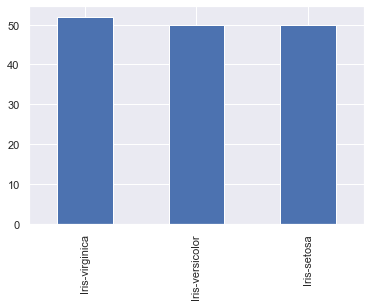

In [230]:
pd.value_counts(Iris_df["Species"]).plot(kind="bar")

### Plot the distribution of target variable using histogram

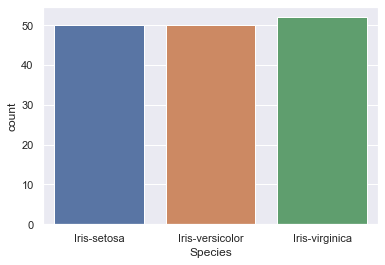

In [214]:
sns.countplot(D)

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

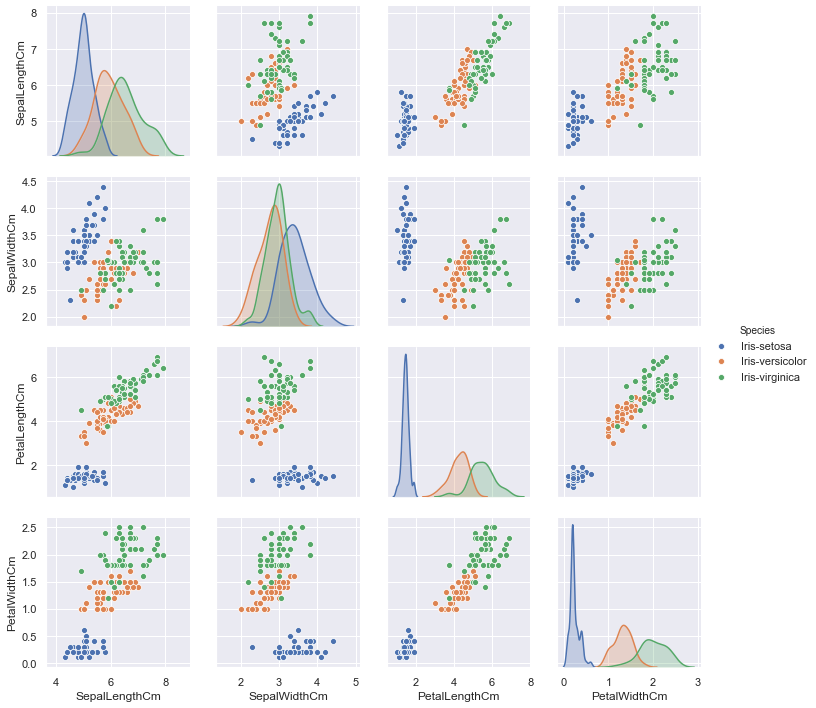

In [215]:
sns.pairplot(Iris_df, hue="Species")

### Summary Statistics and explain insights for at least 2 variables

In [231]:
Iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000
mean,5.843709,3.054000,3.758667,1.202649
std,0.822577,0.430713,1.752697,0.759657
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
'''PetalLengthCm - This column has a high standard deviation 1.75 with respect to its mean 3.75 and its 68 percent of values lie between 5.10 cm to 1.60cm'''
'''SepalWidthCm - This column has a low standard deviation 0.43 from its mean 3.05 and 68 percent of values lie between 3.30 to 2,80'''

### Correlation among all variables and give your insights

In [232]:
Iris_df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109368,0.871741,0.816256
SepalWidthCm,-0.109368,1.000000,-0.420516,-0.355808
PetalLengthCm,0.871741,-0.420516,1.000000,0.960771
PetalWidthCm,0.816256,-0.355808,0.960771,1.000000


### Split data in Training and Validation in 80:20

In [238]:
X_train, X_test, y_train, y_test = train_test_split(I, D, test_size=0.20, random_state=40)

### Do Feature Scaling

### Train and Fit NaiveBayes Model

In [239]:
from sklearn.naive_bayes import GaussianNB

Iris_df_GNB = GaussianNB()
Iris_df_GNB = Iris_df_GNB.fit(X_train, y_train)

y_pred_GNB=Iris_df_GNB.predict(X_test)

In [240]:
y_pred_GNB

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype='<U15')

### Print Accuracy and Confusion Matrix and Conclude your findings

In [241]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GNB)

1.0

In [242]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 13]]
